In [0]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import numpy

In [0]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [0]:
import pandas as pd
import numpy as np

In [4]:
data =pd.read_excel("/content/drive/My Drive/myprojectml/concrete.xls")
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# shape
print(data.shape)

(1030, 9)


In [6]:
# descriptions
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


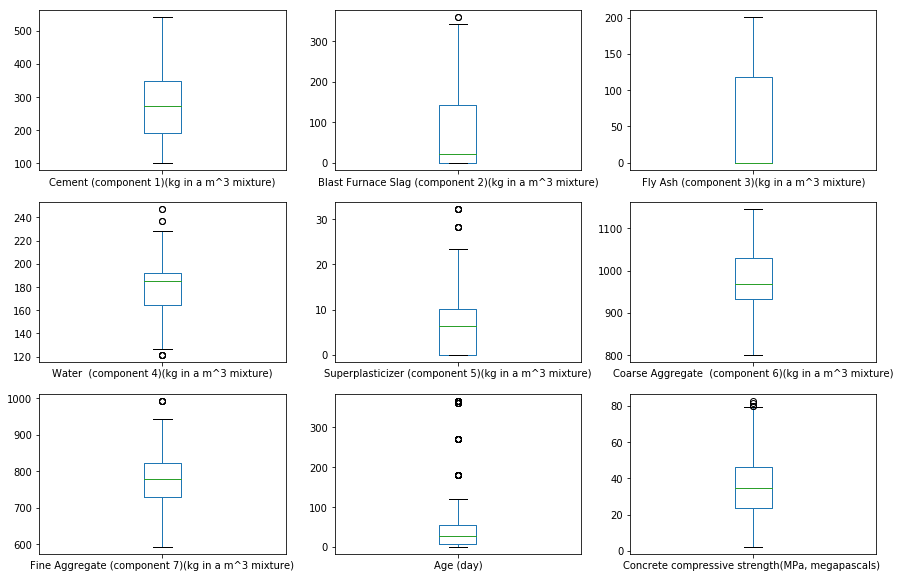

In [7]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(15,10))
plt.show()

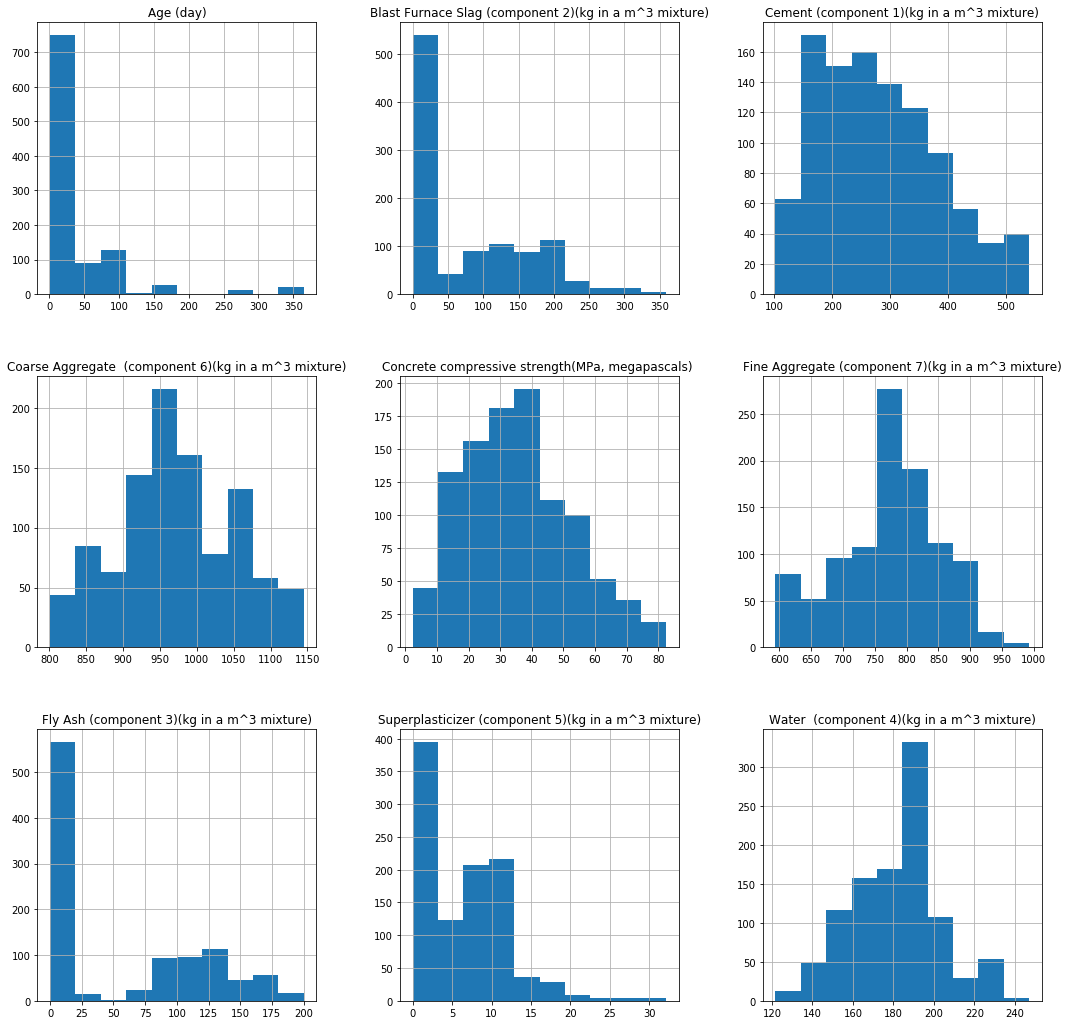

In [0]:
# histograms
data.hist(figsize=(18,18))
plt.show()

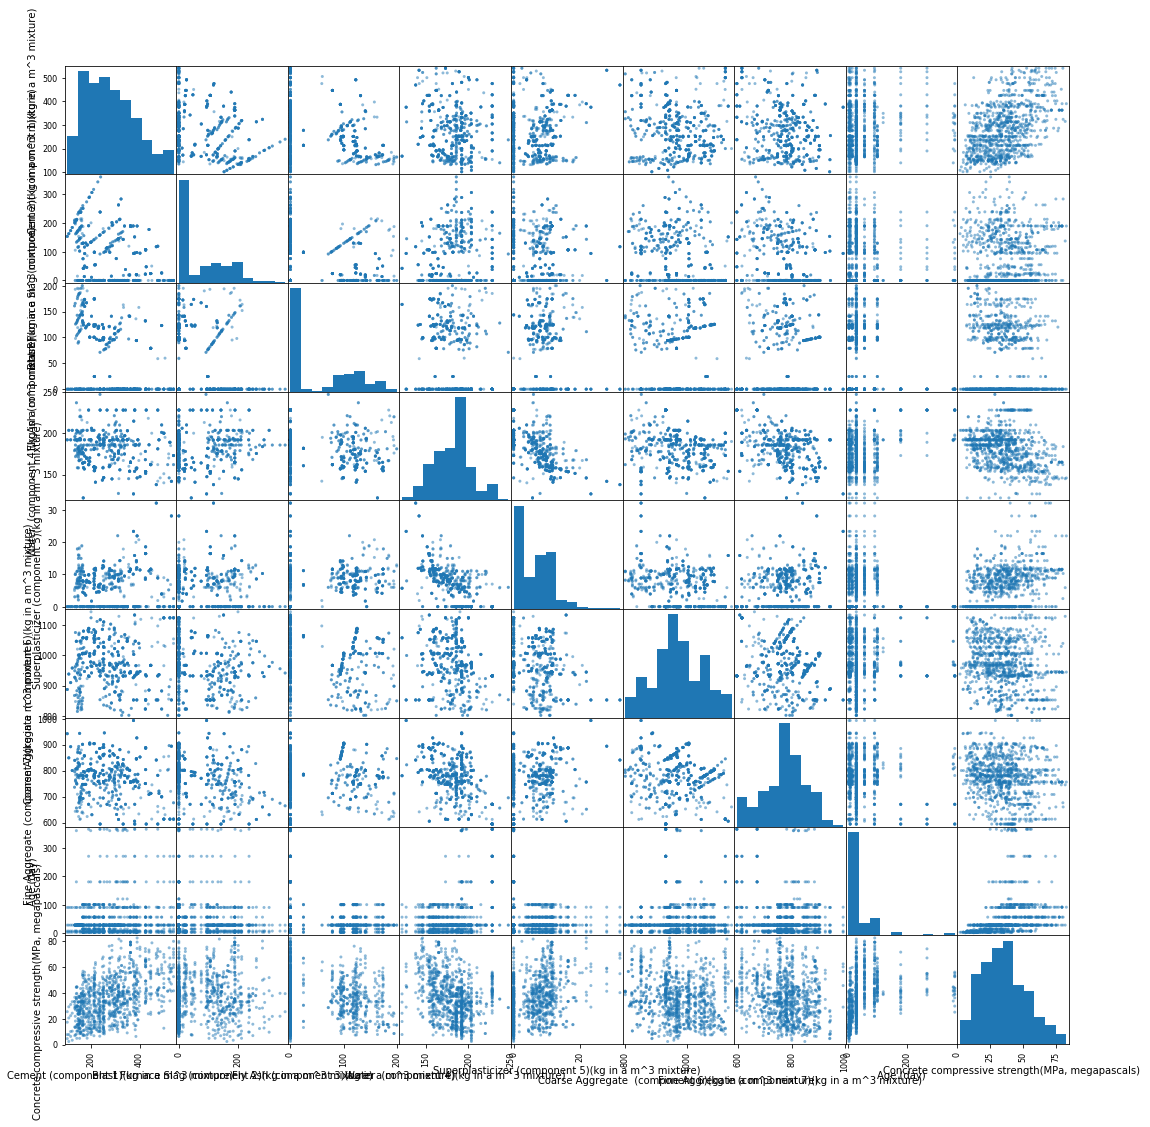

In [0]:
# scatter plot matrix
scatter_matrix(data,figsize=(18,18))
plt.show()

In [0]:
# Split-out validation dataset
array = data.values
X=array[:,0:8]
Y=array[:,8]
Y=Y.flatten()
validation_size = 0.20
seed = 6
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [9]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LS', Lasso()))
models.append(('RG', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('AR', AdaBoostRegressor()))
models.append(('ER', ExtraTreesRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
#models.append(('GBR', GradientBoostingRegressor()))
# evaluate each model in turn
results=[]
names=[]
for name,model in models:
    model.fit(X_train,Y_train)
    cv_results=r2_score(Y_train, model.predict(X_train))
    rms=np.sqrt(mean_squared_error(Y_train,model.predict(X_train)))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    RMS="RMS=%f"%(rms)
    print(msg)
    print(RMS)
    print("\r")

LR: 0.616210 
RMS=10.110796

LS: 0.615980 
RMS=10.113832

RG: 0.616210 
RMS=10.110796

KNN: 0.810735 
RMS=7.100250

AR: 0.812956 
RMS=7.058480

ER: 0.996665 
RMS=0.942471

DTR: 0.996665 
RMS=0.942471

RFR: 0.976025 
RMS=2.527093



In [10]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LS', Lasso()))
models.append(('RG', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('AR', AdaBoostRegressor()))
models.append(('ER', ExtraTreesRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
#models.append(('GBR', GradientBoostingRegressor()))
# evaluate each model in turn
results=[]
names=[]
for name,model in models:
    model.fit(X_train,Y_train)
    cv_results=r2_score(Y_validation, model.predict(X_validation))
    rms=np.sqrt(mean_squared_error(Y_validation,model.predict(X_validation)))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    RMS="RMS=%f"%(rms)
    print(msg)
    print(RMS)
    print("\r")

LR: 0.599736 
RMS=11.375277

LS: 0.597359 
RMS=11.409011

RG: 0.599736 
RMS=11.375284

KNN: 0.709088 
RMS=9.697725

AR: 0.814201 
RMS=7.750162

ER: 0.929880 
RMS=4.761119

DTR: 0.893427 
RMS=5.869662

RFR: 0.918310 
RMS=5.138932



In [0]:
naming=['Cement','Blast Furnace' ,'Slag Fly Ash','Water','Superplasticizer','Coarse Aggregate' ,'Fine Aggregate','age']
B=[]
print("ENTER VALUE FOR\n")
for i in naming:
  print(i)
  B.append(input()) 
X_value=np.reshape(B,(1, -1)) 
getresult=ExtraTreesRegressor()
getresult.fit(X_train,Y_train)
predictions=getresult.predict(X_value)
print("CEMENT STRENTH:\r")
print(predictions)

ENTER VALUE FOR

Cement
540.0
Blast Furnace
0.0
Slag Fly Ash
0.0
Water
162.0
Superplasticizer
2.5
Coarse Aggregate
1055.0
Fine Aggregate
676.0
age
28
CEMENT STRENTH:
[61.88736576]


In [0]:
331

331